### About

A simple python test utility that tests connection to the SAP HANA from Python.


### Dependencies

* https://github.com/SAP/PyHDB


### Notes

How to figure out the right port (SQL PORT) of a tenant (more here - https://github.com/SAPDocuments/How-Tos/issues/36):
```sql
SELECT SERVICE_NAME, PORT, SQL_PORT, (PORT + 2) HTTP_PORT
FROM SYS.M_SERVICES
WHERE ((SERVICE_NAME='indexserver' and COORDINATOR_TYPE= 'MASTER') or (SERVICE_NAME='xsengine'));
```

### Settings

* Create file ```settings.py``` with following parameters (you need to provide your onces):

```
HOST = "<>"
PORT = <>
USER = '<>'
PASSWORD = '<>'

DB_SCHEMA = '<>'
DB_TABLE_TEST = '<>'
```

In [11]:
%matplotlib inline

import pyhdb
import pandas as pd
import settings as settings

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# global IPython settings
plt.style.use('ggplot')

#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 25, 12

#### Establish a Connection to SAP HANA Tenant

In [2]:
connection = pyhdb.connect(
    host=settings.HOST,
    port=settings.PORT,
    user=settings.USER,
    password=settings.PASSWORD
)

#### Fetch Test Data

In [22]:
# database schema/table
SH_SCHEMA = settings.DB_SCHEMA
SH_TABLE_NAME = settings.DB_TABLE_TEST

# open cursor for DB interaction
cursor = connection.cursor()

# specify SQL to be executed
sql = 'SELECT * FROM "{0}"."{1}"'.format(SH_SCHEMA, SH_TABLE_NAME)

print ('[i] execution following SQL\n: {0}'.format(sql))

# execute cursor
cursor.execute(sql)

# fetch data from the databsae (only first )
for index, row in enumerate(cursor.fetchall()):
    print ('[i] fetching row: {0}'.format(index))
    if index < 10:
        print(row)
    else:
        break

# close cursor
cursor.close()

[i] execution following SQL
: SELECT * FROM "GBI_000"."PAL_MLR_HOUSE_PRICES_FITTED_TBL"
[i] fetching row: 0
(0, 25.17574577482189)
[i] fetching row: 1
(1, 23.77402099172013)
[i] fetching row: 2
(2, 30.72803225334186)
[i] fetching row: 3
(3, 29.025937873861153)
[i] fetching row: 4
(4, 30.38215211205702)
[i] fetching row: 5
(5, 23.855939972550743)
[i] fetching row: 6
(6, 20.051258418417383)
[i] fetching row: 7
(7, 21.50759585540623)
[i] fetching row: 8
(8, 16.5833548965877)
[i] fetching row: 9
(9, 19.978441546567943)
[i] fetching row: 10


### Work with pandas

In [23]:
# database schema/table
SH_SCHEMA = settings.DB_SCHEMA
SH_TABLE_NAME = settings.DB_TABLE_TEST

# open cursor for DB interaction
cursor = connection.cursor()

# specify SQL to be executed
sql = 'SELECT * FROM "{0}"."{1}"'.format(SH_SCHEMA, SH_TABLE_NAME)

print ('[i] execution following SQL: {0}'.format(sql))

# fetch some data
cursor.execute(sql)

# create dataframe in pandas out of all data fetched from DB
df = pd.DataFrame(data = cursor.fetchall())

# close cursor
cursor.close()

[i] execution following SQL: SELECT * FROM "GBI_000"."PAL_MLR_HOUSE_PRICES_FITTED_TBL"


### Basic Plotting of Data

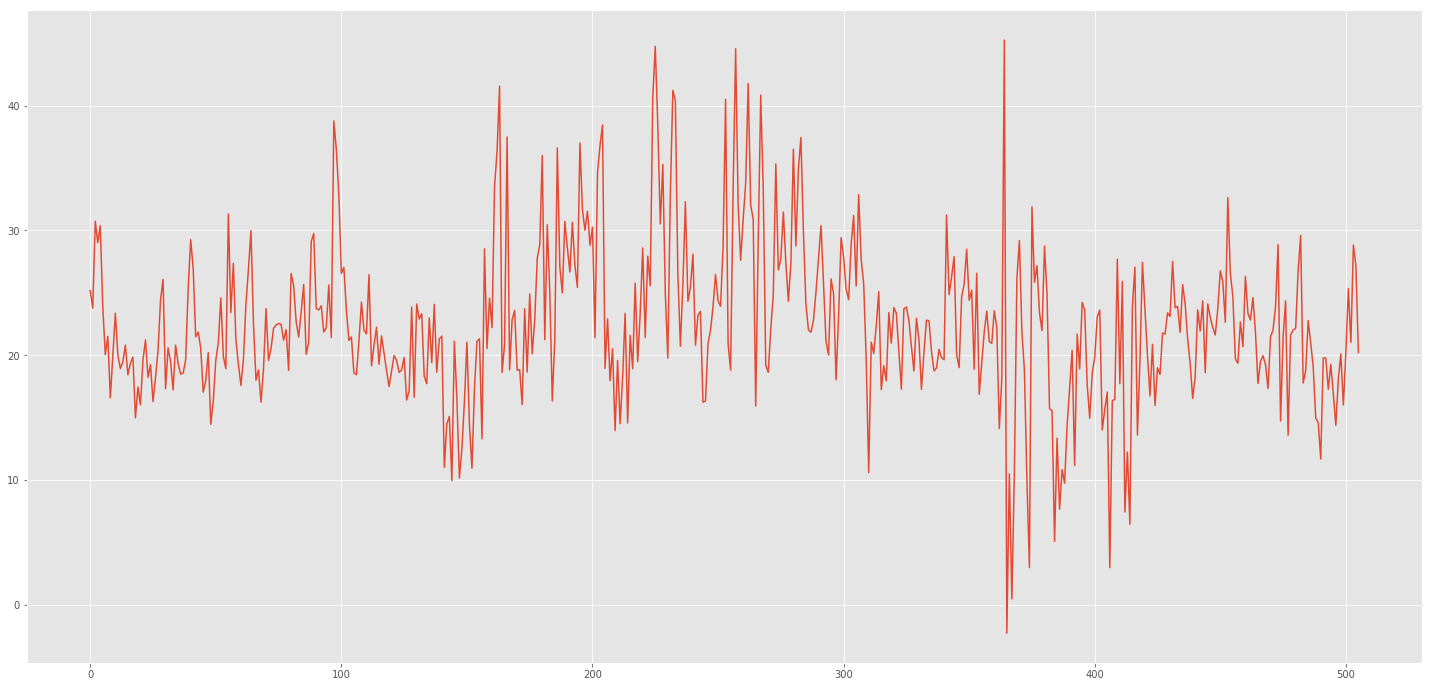

In [25]:
# taking the second column only

df[1].plot()